<a href="https://colab.research.google.com/github/Marouene-Oueslati/Notebooks_DL-AI-TensorFlow-Developer-Professional-Certificate/blob/master/S%2BP_Week_2_Exercise_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
!pip install tf-nightly-2.0-preview


ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


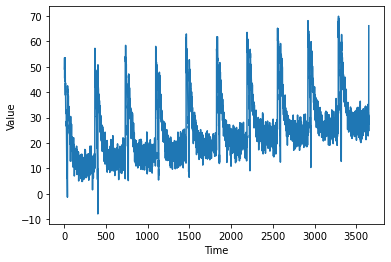

In [5]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    2 / np.exp(9 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.005
noise_level = 3

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

Desired output -- a chart that looks like this:

![Chart showing upward trend and seasonailty](http://www.laurencemoroney.com/wp-content/uploads/2019/07/plot1.png)

In [6]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [16]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
MO=model.fit(dataset,epochs=100,verbose=1)


Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 124.8031
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 35.8830
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 32.3093
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 27.9581
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 31.7765
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 28.8250
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 30.6835
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 26.7233
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 25.7237
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 23.4369
Epoch 11/100
94/94 [==============================] - 1s 6ms/step - loss: 24.1590
Epoch 12/100
94/94 [==============================] - 1s 6ms/step - loss: 25.6847
Epoch 13/100
94/94 [====

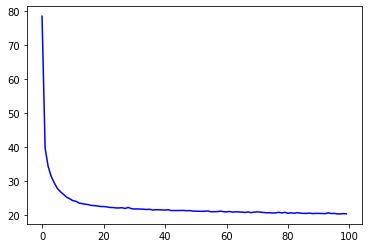

In [19]:
loss = MO.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

[22.617136001586914, 22.536367416381836, 22.347658157348633, 22.326717376708984, 22.211257934570312, 22.191600799560547, 22.28860092163086, 22.0440673828125, 22.35943031311035, 22.007482528686523, 21.88835334777832, 21.91630744934082, 21.86530303955078, 21.835479736328125, 21.751516342163086, 21.811433792114258, 21.588834762573242, 21.687274932861328, 21.670143127441406, 21.63298988342285, 21.580585479736328, 21.690641403198242, 21.4305477142334, 21.437854766845703, 21.447568893432617, 21.44856071472168, 21.479446411132812, 21.389097213745117, 21.4295597076416, 21.28434944152832, 21.250391006469727, 21.245758056640625, 21.190732955932617, 21.25290298461914, 21.293004989624023, 21.077306747436523, 21.104867935180664, 21.11474609375, 21.271337509155273, 21.112863540649414, 21.0411434173584, 21.155794143676758, 20.98682403564453, 21.071319580078125, 21.026824951171875, 20.979236602783203, 20.879684448242188, 21.03397560119629, 20.808147430419922, 20.975048065185547, 21.070940017700195, 20

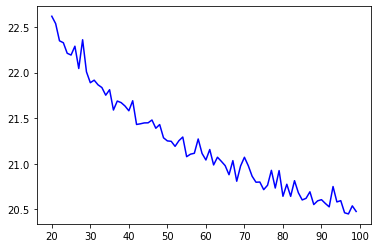

In [23]:
# Plot all but the first 10
loss = MO.history['loss']
epochs = range(20, len(loss))
plot_loss = loss[20:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()


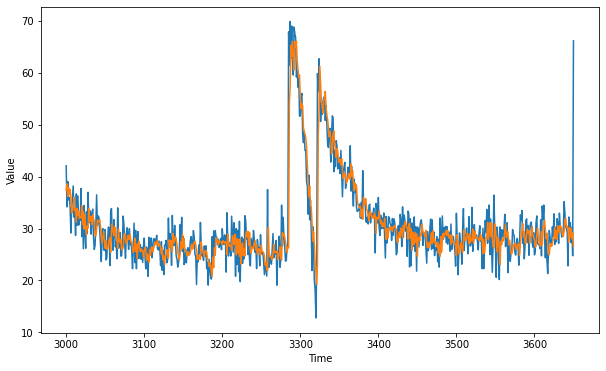

In [11]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [12]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()
# EXPECTED OUTPUT
# A Value less than 3

2.9949155